In [43]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Sequential
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import os

In [4]:
(X_train,y_train,),(X_test,y_test)=datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 39s 0us/step


(50000, 32, 32, 3)

In [11]:
X_test.shape

(10000, 32, 32, 3)

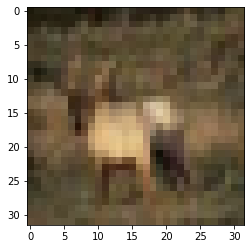

In [12]:
plt.imshow(X_train[3])

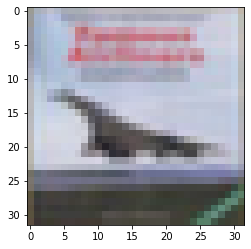

In [8]:
plt.imshow(X_test[3])

In [13]:
y_train.shape

(50000, 1)

In [14]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Reshape the dimension of the y_train data sicne we only need 1 dimensional array

In [17]:
y_train=y_train.reshape(-1,)
y_train[:-5]

array([6, 9, 9, ..., 0, 1, 0], dtype=uint8)

In [18]:
classes=["airplan","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [19]:
classes[9]

'truck'

In [24]:
def plot_sample(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

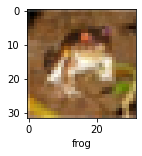

In [25]:
plot_sample(X_train,y_train,0)

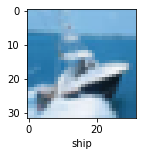

In [27]:
plot_sample(X_train,y_train,8)

In [28]:
X_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

Normalization of our dateset

In [29]:
X_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [30]:
X_train=X_train/255
X_test=X_test/255

First Model training using Artifical Neural Netwok

In [46]:
model_ann= tf.keras.models.Sequential()
model_ann.add(tf.keras.layers.Flatten(input_shape=(32, 32,3)))
model_ann.add(tf.keras.layers.Dense(3000, activation='relu'))
model_ann.add(tf.keras.layers.Dense(1000, activation='relu'))
model_ann.add(tf.keras.layers.Dense(10, activation='softmax'))

model_ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_ann.fit(X_train, y_train, epochs=5)
model_ann.save('first.model')

Epoch 1/5
1563/1563 [==============================] - 194s 123ms/step - loss: 1.8902 - accuracy: 0.3273
Epoch 2/5
1563/1563 [==============================] - 198s 127ms/step - loss: 1.6639 - accuracy: 0.4036
Epoch 3/5
1563/1563 [==============================] - 204s 130ms/step - loss: 1.5824 - accuracy: 0.4307
Epoch 4/5
1563/1563 [==============================] - 197s 126ms/step - loss: 1.5319 - accuracy: 0.4526
Epoch 5/5
1563/1563 [==============================] - 198s 127ms/step - loss: 1.4935 - accuracy: 0.4656


INFO:tensorflow:Assets written to: first.model\assets


INFO:tensorflow:Assets written to: first.model\assets


Evaluation of the model on test date

In [47]:
model_ann.evaluate(X_test,y_test)

313/313 [==============================] - 5s 14ms/step - loss: 1.5242 - accuracy: 0.4593


[1.5241836309432983, 0.4593000113964081]

Classification Report

In [49]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=model_ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 5s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.45      0.51      1000
           1       0.67      0.43      0.52      1000
           2       0.39      0.18      0.25      1000
           3       0.30      0.38      0.33      1000
           4       0.39      0.45      0.42      1000
           5       0.36      0.39      0.37      1000
           6       0.46      0.54      0.50      1000
           7       0.46      0.56      0.50      1000
           8       0.58      0.64      0.61      1000
           9       0.50      0.57      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.47      0.46      0.46     10000
weighted avg       0.47      0.46      0.46     10000



Second Model training using Convolutional Neural Network

In [51]:
CNN= tf.keras.models.Sequential([
#CNN
     layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
     layers.MaxPooling2D(2,2),
     layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
     layers.MaxPooling2D(2,2),
#Dense
     layers.Flatten(),
     layers.Dense(64, activation='relu'),
     layers.Dense(10, activation='softmax')
])

In [53]:
CNN.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
CNN.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 40s 24ms/step - loss: 1.4633 - accuracy: 0.4739
Epoch 2/10
1563/1563 [==============================] - 38s 25ms/step - loss: 1.1048 - accuracy: 0.6131
Epoch 3/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.9682 - accuracy: 0.6618
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.8775 - accuracy: 0.6968
Epoch 5/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.8104 - accuracy: 0.7175
Epoch 6/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.7496 - accuracy: 0.7405
Epoch 7/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.6963 - accuracy: 0.7585
Epoch 8/10
1563/1563 [==============================] - 38s 25ms/step - loss: 0.6493 - accuracy: 0.7729
Epoch 9/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.6067 - accuracy: 0.7874
Epoch 10/10
1563/1563 [==============================] - 39s 25m

Evaluation on test dataset

In [57]:
CNN.evaluate(X_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.9589 - accuracy: 0.6917


[0.9589183330535889, 0.6916999816894531]

In [58]:
y_pred=CNN.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("Classification Report: \n",classification_report(y_test,y_pred_classes))

313/313 [==============================] - 3s 8ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.61      0.81      0.69      1000
           1       0.71      0.87      0.78      1000
           2       0.71      0.47      0.56      1000
           3       0.57      0.46      0.51      1000
           4       0.68      0.62      0.65      1000
           5       0.59      0.65      0.62      1000
           6       0.79      0.76      0.77      1000
           7       0.69      0.77      0.72      1000
           8       0.80      0.80      0.80      1000
           9       0.80      0.70      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.69     10000
weighted avg       0.70      0.69      0.69     10000



In [59]:
y_test=y_test.reshape(-1,)
y_test[:-5]

array([3, 8, 8, ..., 3, 5, 3], dtype=uint8)

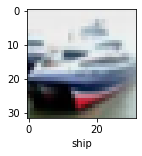

In [61]:
plot_sample(X_test,y_test,1)